In [13]:
import numpy as np
import Loader
import Transformer

In [14]:
#note loading data also shuffles order of the data
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

### Notes on Principal Component Analysis

Does it make sense to run PCA on like-type parts of the data?
As there are clearly different "sets" of the data per row.

In [3]:
#for i in range(len(labelsTrain)):
#    print(i, '\b:\t', labelsTrain[i], compoundDataTrain[35:40, i])
    
#for all the following ranges begin is inclusive and end is not inclusive
#[0:10] docking_score_? (0-9)
#[10:20] fusion_score_? (0-9)
#[37:45] bcut2d_? (8 in total)
#[47:59] chi? (12, odd labels)
#[65:79] paoe_vsa? (1-14)
#[79:89] smr_vsa? (1-10)
#[89:101] slogp_vsa? (1-12)
#[102:113] estate_vsa? (1-11)
#[113:123] vsa_estate? (1-10)
#[143:228] fr_some_chemical? (85 total)

#print(labelsTrain[0:10],"\n")
#print(labelsTrain[10:20],"\n")
#print(labelsTrain[37:45],"\n")
#print(labelsTrain[47:59],"\n")
#print(labelsTrain[65:79],"\n")
#print(labelsTrain[79:89],"\n")
#print(labelsTrain[89:101],"\n")
#print(labelsTrain[102:113],"\n")
#print(labelsTrain[113:123],"\n")
#print(labelsTrain[143:228],"\n")

## Data Preprocessing
PCA, modify fusion/docking, normalization

### Apply Principal Component Analysis

In [15]:
#reduce dimension through PCA
#in order endDims sections are chi, paoe, smr, slogp, estate_vsa, vsa_estate, fr
labelsPCA, trainPCA, testPCA, valPCA = Transformer.applyPCA(labelsTrain,  compoundDataTrain, 
                                                            compoundDataTest, compoundDataValidate,
                                                            endDims=[1,1,4,4,3,3,3,3])
print("PCA done, new dimensions:", len(labelsPCA))

bcut2d retention: [0.99364773]
	total: 99.36477273412319%
chi retention: [0.9541968]
	total: 95.4196796859789%
paoe retention: [0.31495127 0.19509321 0.1390042  0.08838179]
	total: 73.74304791821308%
smr retention: [0.50634726 0.24568468 0.08792319 0.07435827]
	total: 91.43133907840053%
slogp retention: [0.44620276 0.22134465 0.15753302]
	total: 82.50804204396218%
estate_vsa retention: [0.29224011 0.18964809 0.14361318]
	total: 62.55013868306436%
vsa_estate retention: [0.49255304 0.32866098 0.09719245]
	total: 91.84064669216812%
fr retention: [0.32153498 0.12578177 0.09944384]
	total: 54.67605936050468%
PCA done, new dimensions: 88


### Use either mean or max magnitude of docking and fusion

Actually quite similar e.g. for the first 3 rows:

fusion max:  $[5.3211, 5.3258, 5.3936]$

fusion avg:  $[5.0530, 5.2303, 5.1805]$

docking max: $[6.7, 7.2, 7.3]$

docking avg: $[-6.51, -6.92, -7.18]$

In [16]:
#use mean of the docking and fusion
labelsMeanPCA, trainMeanPCA = Transformer.useAverageFD(labelsPCA, trainPCA)
_, testMeanPCA = Transformer.useAverageFD(labelsPCA, testPCA)
_, valMeanPCA = Transformer.useAverageFD(labelsPCA, valPCA)
print("Mean of Fusion and Docking, new dimensions: ", len(labelsMeanPCA))

Mean of Fusion and Docking, new dimensions:  70


In [17]:
#use max magnitude of the docking and fusion
labelsMaxPCA, trainMaxPCA = Transformer.useMaxFD(labelsPCA, trainPCA)
_, testMaxPCA = Transformer.useMaxFD(labelsPCA, testPCA)
_, valMaxPCA = Transformer.useMaxFD(labelsPCA, valPCA)
print("Max of Fusion and Docking, new dimensions: ", len(labelsMeanPCA))

Max of Fusion and Docking, new dimensions:  70


### Assign final data and normalize data

In [18]:
#after transformations are done assign data
dataLabels = labelsMeanPCA
trainData = trainMeanPCA
testData = testMeanPCA
valData = valMeanPCA

trainData, testData, valData = Transformer.normalizeData(trainData, testData, valData, newMean=0, newStd=1)

## See modified labels and example data:

In [19]:
print(np.shape(trainData))
for i in range(len(dataLabels)):
    print(i, "\b:\t", dataLabels[i], "\t", trainData[0:3,i])

(2717, 70)
0 :	 docking_score_average 	 [-0.62594294 -1.31017257  0.05828669]
1 :	 fusion_score_average 	 [-1.7705222   0.71250749  0.44915279]
2 :	 maxestateindex 	 [0.15872059 0.56272994 0.15117699]
3 :	 minestateindex 	 [-1.00952972  0.28822883  0.81669587]
4 :	 maxabsestateindex 	 [0.15872059 0.56272994 0.15117699]
5 :	 minabsestateindex 	 [ 0.10009438 -0.75095761 -0.07528566]
6 :	 qed 	 [ 0.17343876 -0.64263598  0.90556025]
7 :	 molwt 	 [ 0.23196364  0.64695605 -0.34387461]
8 :	 heavyatommolwt 	 [ 0.22836806  0.60940443 -0.38919743]
9 :	 exactmolwt 	 [ 0.2338092   0.64928841 -0.34162785]
10 :	 numvalenceelectrons 	 [ 0.24205523  0.80078172 -0.18773438]
11 :	 numradicalelectrons 	 [0. 0. 0.]
12 :	 maxpartialcharge 	 [-0.01918824 -0.01918824 -0.01918824]
13 :	 minpartialcharge 	 [-0.90218411  0.74529048 -0.90225003]
14 :	 maxabspartialcharge 	 [-0.01918824 -0.01918824 -0.01918824]
15 :	 minabspartialcharge 	 [-0.53409545  0.06934049  0.59814444]
16 :	 fpdensitymorga

# Apply NN

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

In [21]:
#note the constant guess:
classify = Transformer.toClassification(activitiesTrain)
constantGuess = (len(classify[classify == 1]))/len(classify)
print(constantGuess)

0.6198012513801987


In [25]:
classTrain = Transformer.toClassification(activitiesTrain)
classVal = Transformer.toClassification(activitiesValidate)


tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)
l1Reg = 0

model = Sequential()
model.add(Dense(len(10), input_dim=len(), activation='relu', 
                kernel_regularizer = keras.regularizers.L2(l1Reg)))
model.add(Dense(50, activation='relu', kernel_regularizer = keras.regularizers.L1(l1Reg)))
model.add(Dense(20, activation='relu', kernel_regularizer = keras.regularizers.L1(l1Reg)))
model.add(Dense(1, activation='tanh', kernel_regularizer = keras.regularizers.L1(l1Reg)))

model.compile(loss='MeanSquaredError', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(trainData, Transformer.toClassification(activitiesTrain), 
                    validation_data = (valData, classVal), epochs=1600, batch_size=4)

Epoch 1/1600
680/680 [==============================] - 3s 3ms/step - loss: 0.7546 - accuracy: 0.1152 - val_loss: 0.6271 - val_accuracy: 0.2647
Epoch 2/1600
680/680 [==============================] - 1s 2ms/step - loss: 0.5799 - accuracy: 0.3154 - val_loss: 0.5583 - val_accuracy: 0.3765
Epoch 3/1600
680/680 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.3901 - val_loss: 0.5263 - val_accuracy: 0.3941
Epoch 4/1600
680/680 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.4100 - val_loss: 0.5048 - val_accuracy: 0.4059
Epoch 5/1600
680/680 [==============================] - 1s 2ms/step - loss: 0.4655 - accuracy: 0.4236 - val_loss: 0.4895 - val_accuracy: 0.4118
Epoch 6/1600
680/680 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.4332 - val_loss: 0.4780 - val_accuracy: 0.4147
Epoch 7/1600
680/680 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.4376 - val_loss: 0.4670 - val_accuracy:

KeyboardInterrupt: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


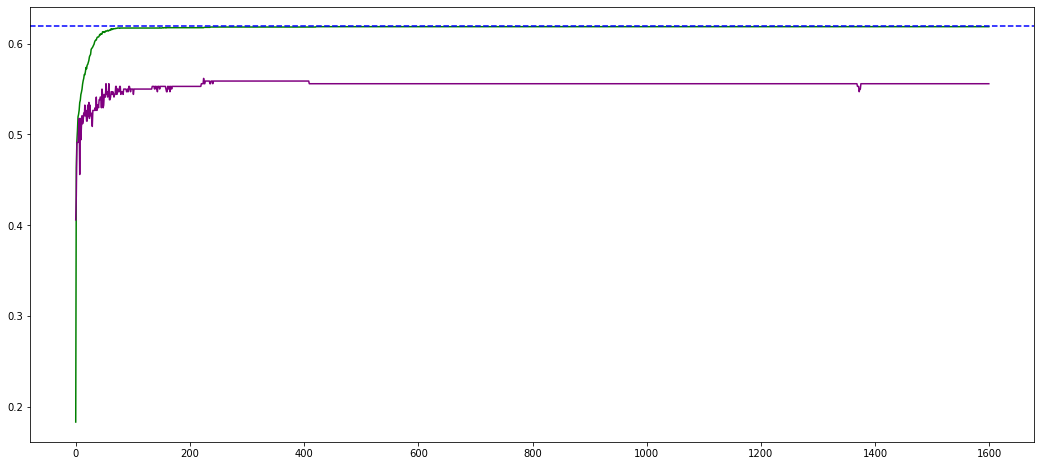

In [27]:
import matplotlib.pyplot as plt

print(history.history.keys())

classify = Transformer.toClassification(activitiesTrain)
constantGuess = (len(classify[classify == 1]))/len(classify)


fig, ax = plt.subplots(figsize=(18,8))

ax.plot(history.history["accuracy"], color="green")
ax.plot(history.history["val_accuracy"], color="purple")
ax.axhline(constantGuess, color="blue", linestyle="dashed")

In [73]:
classData = Transformer.toClassification(activitiesTrain)
print(len(trainData))
print(len(classData[classData == 1]))
print(len(classData[classData != 1]))

2717
1684
1033
